<a href="https://colab.research.google.com/github/Vignesh160803/ML_REPO/blob/main/convolution_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraires

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# 2.image pre processing

In [ ]:
#1.import image data generator
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#2.Configure the image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals

 56% 368M/656M [00:03<00:02, 122MB/s]

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg

In [ ]:
#3.Apply image data generator functionality to train and test images
x_train=train_datagen.flow_from_directory(r'/content/dataset/Training',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'/content/dataset/Testing',target_size = (64,64),batch_size = 32 , class_mode = 'categorical')

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [ ]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


print(x_test.class_indices)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Model building

In [ ]:
#2.initializing the model
model=Sequential()

In [ ]:
#3.add convolution layer(no.of filters,size of filter,input shape)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))


In [ ]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#add flatten layer
model.add(Flatten())

In [ ]:
#ann hidden layer
model.add(Dense(units=128,activation="relu"))


In [ ]:
#output layer
model.add(Dense(units=4,activation="softmax"))

In [ ]:
#Complie the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")


In [ ]:
#fit model (x_train,steps_per epoch,epochs,validation_data,validation_steps)
model.fit(x_train,steps_per_epoch=len(x_train),epochs=5,validation_data=x_test,validation_steps=10)


Epoch 1/5
39/39 [==============================] - 12s 268ms/step - loss: 1.4442 - accuracy: 0.3845 - val_loss: 0.9744 - val_accuracy: 0.6187
Epoch 2/5
39/39 [==============================] - 11s 289ms/step - loss: 0.9443 - accuracy: 0.6244 - val_loss: 0.8765 - val_accuracy: 0.6500
Epoch 3/5
39/39 [==============================] - 9s 236ms/step - loss: 0.7950 - accuracy: 0.6963 - val_loss: 0.6438 - val_accuracy: 0.7594
Epoch 4/5
39/39 [==============================] - 11s 272ms/step - loss: 0.7340 - accuracy: 0.7100 - val_loss: 0.6468 - val_accuracy: 0.7781
Epoch 5/5
39/39 [==============================] - 11s 294ms/step - loss: 0.6334 - accuracy: 0.7690 - val_loss: 0.5405 - val_accuracy: 0.8031


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3,937,796
Trainable params: 3,937,796
Non-trainable params: 0
______________________________________________

In [ ]:
#save the model
model.save("animal1_class.h5")

# testing the model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model(r"/content/animal1_class.h5",compile=False)

In [ ]:
img=image.load_img(r"/content/dataset/Testing/elephants/Z (1).jpeg",target_size=(64,64))

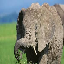

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[119., 160., 204.],
        [121., 162., 206.],
        [123., 164., 208.],
        ...,
        [106., 152., 202.],
        [104., 150., 200.],
        [103., 149., 199.]],

       [[119., 160., 204.],
        [121., 162., 206.],
        [123., 164., 208.],
        ...,
        [110., 150., 199.],
        [110., 148., 197.],
        [106., 146., 195.]],

       [[119., 160., 204.],
        [121., 162., 206.],
        [123., 164., 208.],
        ...,
        [112., 150., 199.],
        [111., 147., 195.],
        [108., 144., 192.]],

       ...,

       [[108., 148.,  75.],
        [105., 145.,  72.],
        [111., 151.,  78.],
        ...,
        [110., 150.,  79.],
        [110., 151.,  75.],
        [112., 153.,  75.]],

       [[100., 140.,  67.],
        [ 96., 136.,  63.],
        [107., 147.,  74.],
        ...,
        [107., 144.,  74.],
        [113., 151.,  78.],
        [112., 150.,  75.]],

       [[102., 142.,  71.],
        [ 98., 138.,  67.],
        [105., 1

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
pred = np.argmax(model.predict(x)) # predicting the higher probability index
index = ['bears','crows','elephants','rats']
pred

1/1 [==============================] - 0s 100ms/step


2

In [ ]:
index[pred]

'elephants'